### keras DNN으로 집 값 예측하기

### 1. 패키지 수입 및 하이퍼 파라미터 지정

패키지 수입

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD

하이퍼 파라미터 지정

In [2]:
MY_HIDDEN = 3000
MY_EPOCH = 1000
MY_BATCH = 64
pd.set_option('display.max_columns', None)
import numpy as np
np.random.seed(13)

### 2. 데이터 불러 오기 및 선처리

데이터 파일 읽기\
결과는 pandas의 데이터 프레임 형식

In [3]:
heading = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

raw = pd.read_csv('/content/drive/MyDrive/housing.csv')

데이터 원본 출력

In [4]:
print('원본 데이터 샘플 10개')
print(raw.head(10))

print('원본 데이터 통계')
print(raw.describe())

원본 데이터 샘플 10개
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33 

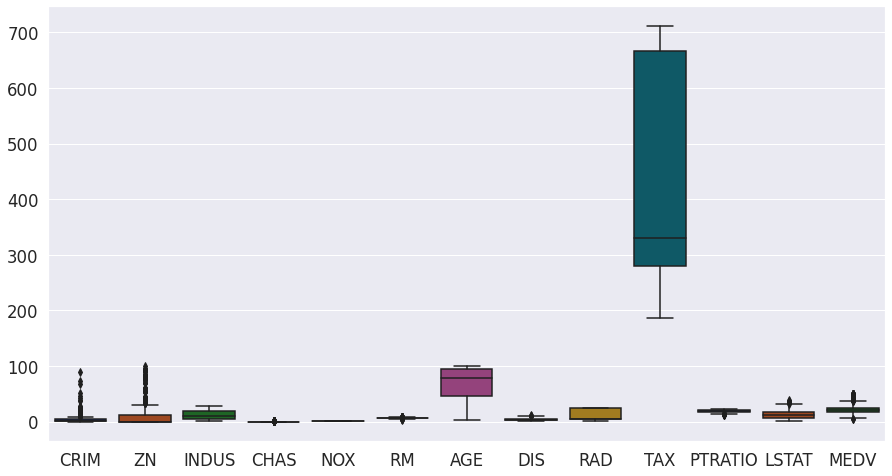

In [5]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.5)
sns.boxplot(data=raw, palette='dark')

Z-점수 정규화\
결과는 numpy의 n-차원 행렬 형식

In [6]:
scaler = StandardScaler()
Z_data = scaler.fit_transform(raw)

데이터 형식 출력

In [7]:
print(type(raw))
print(type(Z_data))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


numpy에서 pandas로 전환\
header 정보 복구 필요

In [8]:
Z_data = pd.DataFrame(Z_data, columns=heading)

정규화 된 데이터 출력

In [9]:
print('정규화 된 데이터 샘플 10개')
print(Z_data.head(10))

print('정규화 된 데이터 통계')
print(Z_data.describe())

정규화 된 데이터 샘플 10개
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
5 -0.417044 -0.487722 -1.306878 -0.272599 -0.835284  0.207096 -0.351157   
6 -0.410243  0.048772 -0.476654 -0.272599 -0.265154 -0.388411 -0.070229   
7 -0.403696  0.048772 -0.476654 -0.272599 -0.265154 -0.160466  0.978808   
8 -0.395935  0.048772 -0.476654 -0.272599 -0.265154 -0.931206  1.117494   
9 -0.400729  0.048772 -0.476654 -0.272599 -0.265154 -0.399808  0.616090   

        DIS       RAD       TAX   PTRATIO     LSTAT      MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000 -1.075562  0.159686  
1  0.557160 -0.867883 -0.9873

데이터를 입력과 출력으로 분리

In [10]:
print('\n분리 전 데이터 모양: ', Z_data.shape)
X_data = Z_data.drop('MEDV', axis=1)
Y_data = Z_data['MEDV']

print('\n분리 후 데이터 모양: ')
print(X_data.shape)
print(Y_data.shape)


분리 전 데이터 모양:  (506, 13)

분리 후 데이터 모양: 
(506, 12)
(506,)


데이터를 학습용과 평가용으로 분리

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.7)

In [12]:
print('\n학습용 입력 데이터 모양:', X_train.shape)
print('학습용 출력 데이터 모양:', Y_train.shape)
print('평가용 입력 데이터 모양:', X_test.shape)
print('평가용 출력 데이터 모양', Y_test.shape)


학습용 입력 데이터 모양: (354, 12)
학습용 출력 데이터 모양: (354,)
평가용 입력 데이터 모양: (152, 12)
평가용 출력 데이터 모양 (152,)


상자 그림 출력

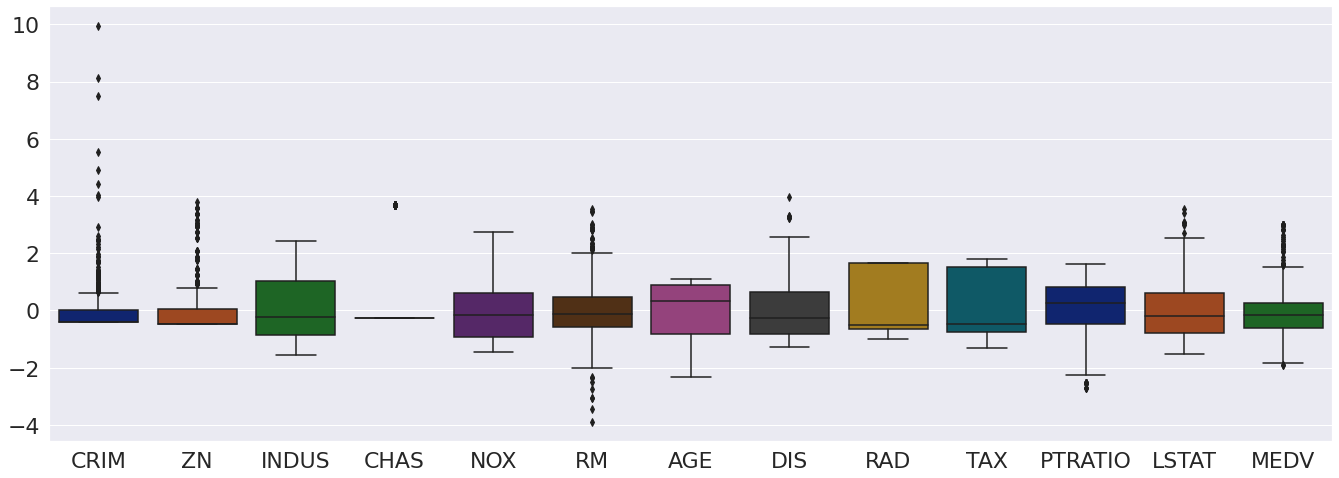

In [13]:
plt.figure(figsize=(23, 8))
sns.set(font_scale=2)
sns.boxplot(data=Z_data, palette='dark')
plt.show()

### 3. 인공신경망 구현

케라스 DNN 구현

In [14]:
model = Sequential()

input = X_train.shape[1]
model.add(Dense(units=MY_HIDDEN, input_dim=input, activation='relu'))

model.add(Dense(units=MY_HIDDEN, activation='relu'))

model.add(Dense(units=1))

print('\nDNN 요약')
model.summary()


DNN 요약
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3000)              39000     
_________________________________________________________________
dense_1 (Dense)              (None, 3000)              9003000   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3001      
Total params: 9,045,001
Trainable params: 9,045,001
Non-trainable params: 0
_________________________________________________________________


### 4. 인공신경망 학습

최적화 함수와 손실 함수 지정

In [15]:
model.compile(optimizer='sgd', loss='mse') # sgd, rmsprop, adam, nadam / mse, mae
#(optimizer=SGD(lr = 0.001, momentum = 0.9, decay = 0.0002, nesterov = False)
print('\nDNN 학습 시작')
begin = time()

model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=0)
end = time()
print('총 학습 시간: {:.2f}초'.format(end - begin))


DNN 학습 시작
총 학습 시간: 10.04초


### 5. 인공신경망 평가

신경망 평가 및 손실값 계산

In [16]:
loss = model.evaluate(x=X_test, y=Y_test, verbose=0)

# print('\nDNN 평균 제곱 오차 (MSE): {:.2f}'.format(loss))
print('\n최종 손실값: {:.2f}'.format(loss))
print('\n최종 손실값: ',loss)

#print('첫번째 평가용 데이터 입력')
#print(X_test[0])
#print('첫번째 평가용 데이터 출력')
#print(Y_test[0])
print(type(X_test))
print('\n첫 번째 평가용 데이터 입력\n')
print(X_test.iloc[0])
print('\n첫 번째 평가용 데이터 출력\n')
print(Y_test.iloc[0])


최종 손실값: 0.13

최종 손실값:  0.12816768884658813
<class 'pandas.core.frame.DataFrame'>

첫 번째 평가용 데이터 입력

CRIM       1.327804
ZN        -0.487722
INDUS      1.015999
CHAS      -0.272599
NOX        0.512296
RM        -1.397069
AGE        1.021481
DIS       -0.805438
RAD        1.661245
TAX        1.530926
PTRATIO    0.806576
LSTAT      1.718101
Name: 477, dtype: float64

첫 번째 평가용 데이터 출력

-1.1463640715083314


신경망 활용 및 산포도 출력

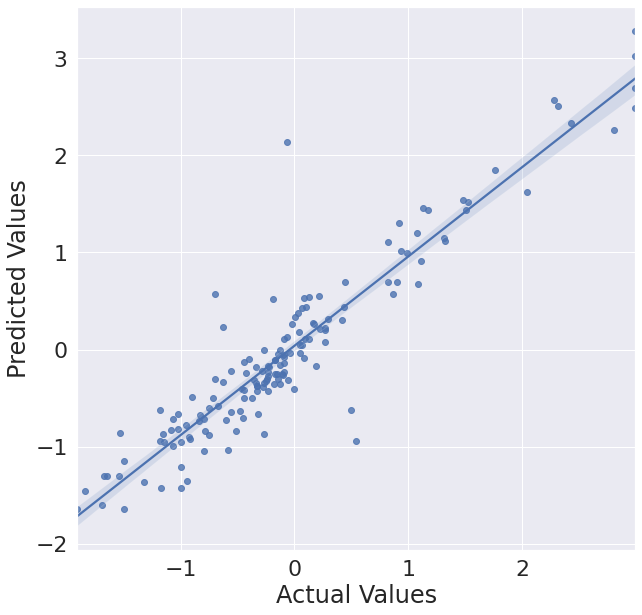

In [17]:
pred = model.predict(x=X_test)
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test, y=pred)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### GPU 확인

In [18]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Jan 10 13:21:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    50W / 300W |    751MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------